# MTpy Example 05

## Depth of Investigation

To get a better idea of depth of investigation we can use the Niblett-Bostick tranformation.  This is a 1D transformation of apparent resistivity to depth.

depth $= \sqrt(\dfrac{\rho_a \cdot T}{2 \cdot \pi \cdot \mu_0})$ in meters.  

Where:

  - $\rho_a$ is the apparent resistivity in $\Omega \cdot m$
  - $T$ is period in seconds
  - $\mu_0$ is the permitivity of free space

In [2]:
from pathlib import Path
from mtpy import MTCollection
%matplotlib inline

### Open MTCollection

In the previous example we created a MTH5 file from existing Yellowstone data.  Let's open that file here for plotting.

In [3]:
%%time

with MTCollection() as mc:
    mc.open_collection(Path().cwd().joinpath("yellowstone_mt_collection.h5"))
    mt_data = mc.to_mt_data()

24:10:17T15:58:42 | INFO | line:777 |mth5.mth5 | close_mth5 | Flushing and closing /home/jovyan/earthscope-mt-course/notebooks/mtpy/yellowstone_mt_collection.h5
CPU times: user 1min 15s, sys: 842 ms, total: 1min 16s
Wall time: 1min 17s


## Plot 1D Depth of Investigation

We can plot the depth of investigation for a single station, which provides the depth estimates for the TE, TM, and Determinant of the impedance tensor.  The Niblett-Bostick method in `mtpy.analysis.niblettbostick.calculate_depth_of_investigation` rotates the data according to 2D strike estimation to get the data into a geoelectric coordinate system so that TE and TM modes are properly represented.  The determinant provides a general guideline to the depth of investigation.  

The plot is on a log-log scale with the y-axis being period from short periods at the top (shallow) and long periods at the bottom (deep).  The x-axis represents the depth of investigation for the given mode.  

  - **TE Mode**: is parallel to geoelectric strike (the more conductive mode) which allows electrical currents to flow well, but also causes them to decay more quickly.  Thus the penetration depth is often shallower than the TM mode.  In this case almost by an order of magnitude.  
  - **TM Mode**: perpendicular to geoelectric strike and thus more resistive.  This allows impinging magnetic fields to penetrate deeper, as seen here
  - **Determinant**: provides a good 1D approximation for the depth of penetration that incorporates all modes.  

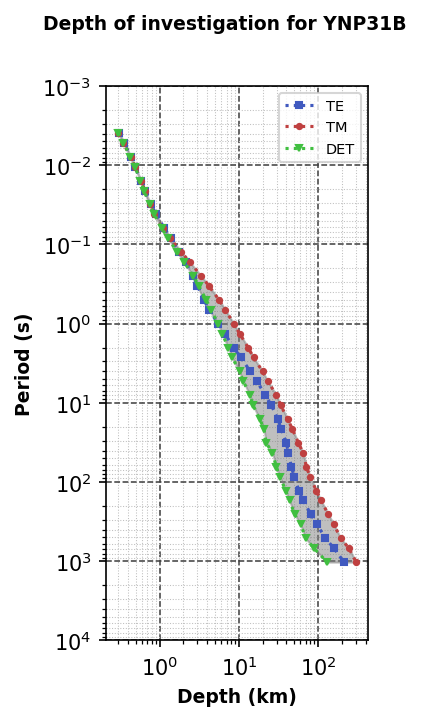

In [4]:
plot_doi_ynp31 = mt_data["YSBB.YNP31B"].plot_depth_of_penetration(fig_num=1) 

### Long Period Depth of Investigation

For comparison lets plot the depth of investigation for the near by long period site "WYYS2".

From the broadband station above, at 1,000 seconds the depth of penetration is about 70 km.  The long period station below is showing a depth of penetration of about 300 km for a period of 15,000 seconds.  Note that this is not only the depth of investigation but also the radius of influence at the given period.  

This also provides a good example of what type of instrument to use depending on your target.  Broadband or wideband instruments usually record over the coarse of 1-3 days depending on logistics, solar activity, and desired periods.  Long period instruments on the other hand usually need 2 to 3 weeks to record to get the long periods but they do not record periods shorter than 1 second.  In an ideal world if you are doing a regional survey you would collect long period data every 30 km or so and fill in with broadband data every 2-10 km.  

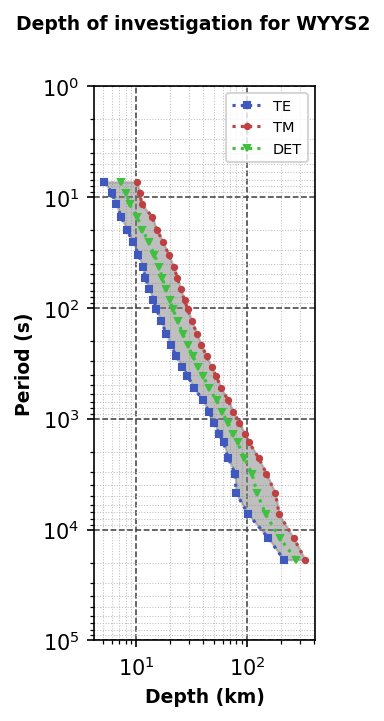

In [5]:
plot_doi_wyys2 = mt_data["Transportable_Array.WYYS2"].plot_depth_of_penetration(fig_num=2)

## Plot Depth of Investigation Maps

Plotting a single station is nice, but sometimes a map view provides a better spatial representation.  Here lets plot all the stations, which will provide general information about the penetration depth for each station and at what depths you might expect to see structures in the modelling. The determinant is the average depth of investigation between the two main modes (TE and TM).  If you plot the different modes you will see that there are different depth of penetration.  This is because the two modes are sensitive to different structures indicating a heterogeneous earth, where there is a preferred direction of current flow.  In this case the TE mode is sensitive to the preferred orientation of electric fields, the conductive direction, and will have a shallower depth of penetration.  Conversely, the TM mode is sensitive to the direction orthogonal to the TE mode where the magnetic field is in the direction of the preferred orientation, or the more resistive direction, and will have a deeper depth of penetration. 

<div class="alert alert-block alert-warning">
<b>Caution:</b> Depth of penetration is just an estimate and is basically a 1D transformation but is not extremely accurate, especially if the data are a little noisy.  Therefore, read these maps as a general approximation. 
</div>

There are interpolation methods for plotting these maps and and include: 

  - `nearest`
  - `linear`
  - `cubic`
  - `delaunay`

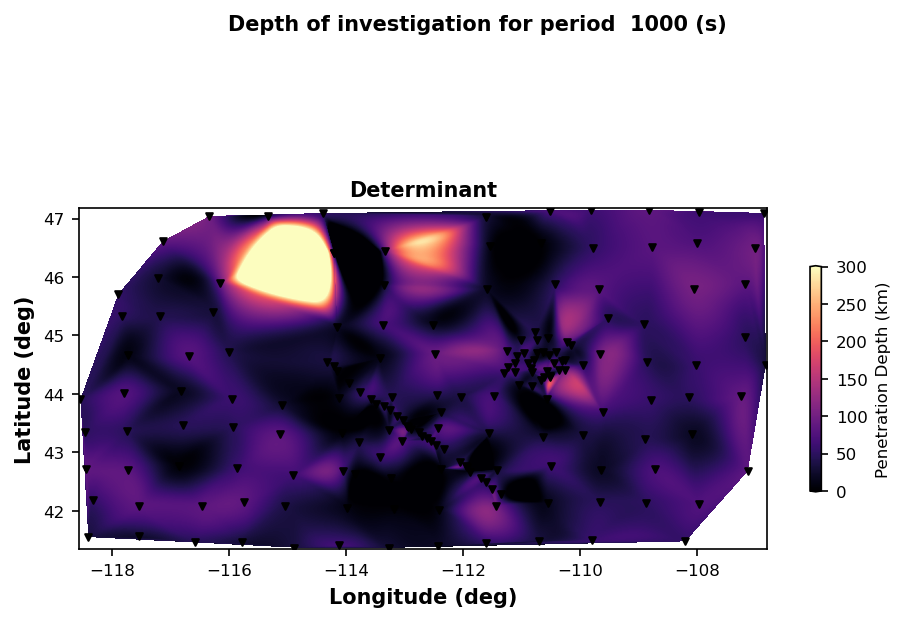

In [7]:
plot_doi_map = mt_data.plot_penetration_depth_map(
    plot_period=1000, 
    interpolation_method="cubic",
    fig_num=3,
    plot_te=False, 
    plot_tm=False,
    depth_range = (0,300)
)

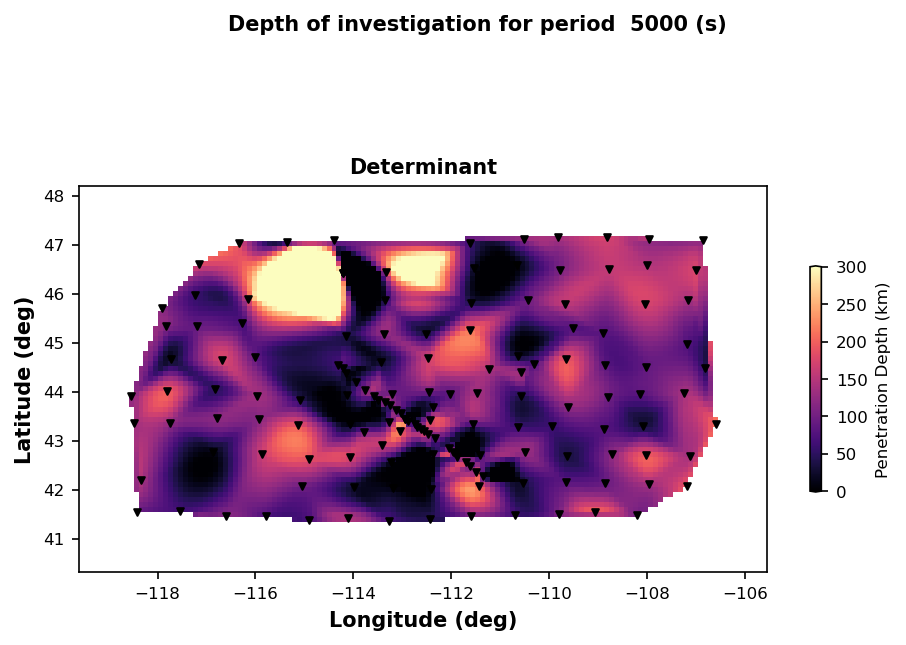

In [14]:
plot_doi_map.plot_period = 5000
plot_doi_map.fig_num = 4
plot_doi_map.interpolation_method = "nearest"
plot_doi_map.depth_range = (0, 300)
plot_doi_map.redraw_plot()

CPU times: user 8.37 s, sys: 176 ms, total: 8.54 s
Wall time: 8.43 s


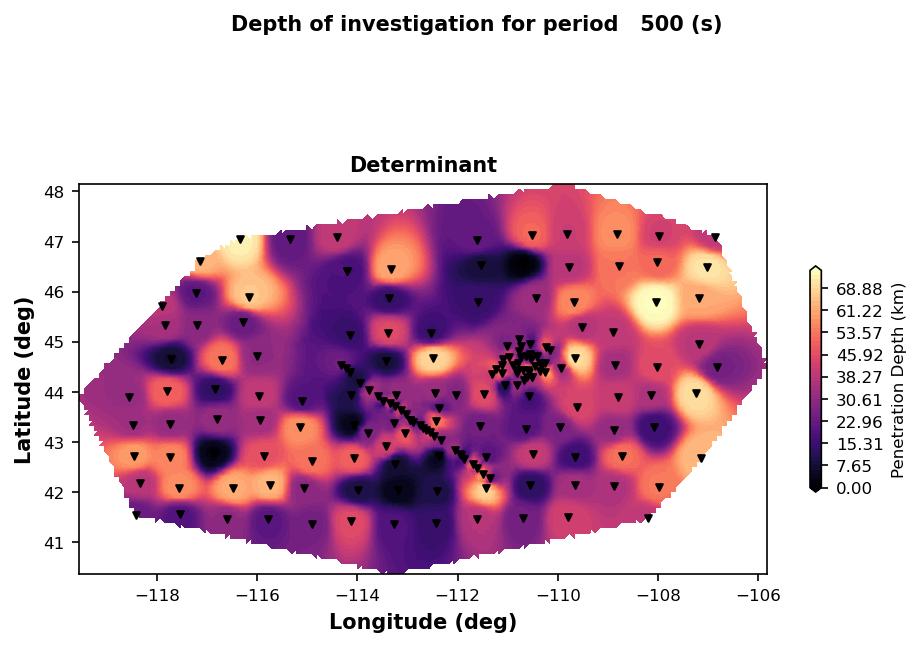

In [12]:
%%time
plot_doi_map.plot_period = 500
plot_doi_map.fig_num = 5
plot_doi_map.cell_size = .1
plot_doi_map.interpolation_method = "delaunay"
plot_doi_map.plot_te = False
plot_doi_map.plot_tm = False
plot_doi_map.depth_range = (0, 75)
plot_doi_map.redraw_plot()